Lectura de la base

In [106]:
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [107]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [108]:
import json
from google.colab import drive

!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json


Mounted at /content/drive


In [109]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [111]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [113]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

### Vistazo general

In [ ]:
print(train.columns)

In [ ]:
train.head(10)

In [13]:
data_types = train.dtypes.value_counts()
print(data_types)

object     43
int64      35
float64     3
dtype: int64


In [12]:
num_filas = train.shape[0]
num_columnas = train.shape[1]

print("Cantidad de filas:", num_filas)
print("Cantidad de columnas:", num_columnas)

Cantidad de filas: 1460
Cantidad de columnas: 81


In [ ]:
object_cols_train = train.select_dtypes(include=['object']).columns.tolist()
print("Columnas de tipo 'object' en train:", object_cols_train)

### Tratamiento de nulls y outliers

In [30]:
null_counts = train.isnull().sum()
variables_con_nulos = null_counts[null_counts > 0]
null_table = pd.DataFrame(variables_con_nulos, columns=['Cantidad de Valores Nulos'])
print(null_table)

             Cantidad de Valores Nulos
Electrical                           1
GarageYrBlt                         81


In [47]:
# Reemplaza los valores nulos por 0 en las columnas especificadas en train y test
train['Alley_bin'] = train['Alley'].fillna(0)
train['PoolQC_bin'] = train['PoolQC'].fillna(0)
train['Fence_bin'] = train['Fence'].fillna(0)
train['MiscFeature_bin'] = train['MiscFeature'].fillna(0)
test['Alley_bin'] = test['Alley'].fillna(0)
test['PoolQC_bin'] = test['PoolQC'].fillna(0)
test['Fence_bin'] = test['Fence'].fillna(0)
test['MiscFeature_bin'] = test['MiscFeature'].fillna(0)

# Asigna 1 a los valores no nulos en las columnas especificadas en train y test
train.loc[train['Alley_bin'] != 0, 'Alley_bin'] = 1
train.loc[train['PoolQC_bin'] != 0, 'PoolQC_bin'] = 1
train.loc[train['Fence_bin'] != 0, 'Fence_bin'] = 1
train.loc[train['MiscFeature_bin'] != 0, 'MiscFeature_bin'] = 1
test.loc[test['Alley_bin'] != 0, 'Alley_bin'] = 1
test.loc[test['PoolQC_bin'] != 0, 'PoolQC_bin'] = 1
test.loc[test['Fence_bin'] != 0, 'Fence_bin'] = 1
test.loc[test['MiscFeature_bin'] != 0, 'MiscFeature_bin'] = 1

In [48]:
#Como posee valores numericos si hay nulls los tomo como 0
train['LotFrontage'] = train['LotFrontage'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(0)

In [49]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [50]:
train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [51]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
train['BsmtQual'] = train['BsmtQual'].map(mapping)
train['BsmtCond'] = train['BsmtCond'].map(mapping)
test['BsmtQual'] = test['BsmtQual'].map(mapping)
test['BsmtCond'] = test['BsmtCond'].map(mapping)
train['BsmtQual'] = train['BsmtQual'].fillna(0)
train['BsmtCond'] = train['BsmtCond'].fillna(0)
test['BsmtQual'] = test['BsmtQual'].fillna(0)
test['BsmtCond'] = test['BsmtCond'].fillna(0)

In [52]:
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['FireplaceQu'] = train['FireplaceQu'].map(mapping)
train['FireplaceQu'] = train['FireplaceQu'].fillna(0)

In [53]:
train['FireplaceQu'] = train['FireplaceQu'].map(mapping)
test['FireplaceQu'] = test['FireplaceQu'].map(mapping)
train['FireplaceQu'] = train['FireplaceQu'].fillna(0)
test['FireplaceQu'] = test['FireplaceQu'].fillna(0)

In [54]:
train['GarageQual'] = train['GarageQual'].map(mapping)
train['GarageCond'] = train['GarageCond'].map(mapping)
test['GarageQual'] = test['GarageQual'].map(mapping)
test['GarageCond'] = test['GarageCond'].map(mapping)
train['GarageQual'] = train['GarageQual'].fillna(0)
train['GarageCond'] = train['GarageCond'].fillna(0)
test['GarageQual'] = test['GarageQual'].fillna(0)
test['GarageCond'] = test['GarageCond'].fillna(0)

In [55]:
mapping_GarType = {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0}
train['GarageType'] = train['GarageType'].map(mapping_GarType)
test['GarageType'] = test['GarageType'].map(mapping_GarType)
train['GarageType'] = train['GarageType'].fillna(0)
test['GarageType'] = test['GarageType'].fillna(0)

In [56]:
mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
train['GarageFinish'] = train['GarageFinish'].map(mapping)
test['GarageFinish'] = test['GarageFinish'].map(mapping)
train['GarageFinish'] = train['GarageFinish'].fillna(0)
test['GarageFinish'] = test['GarageFinish'].fillna(0)

In [57]:
mapping_bsmt = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
train['BsmtFinType1'] = train['BsmtFinType1'].map(mapping_bsmt)
train['BsmtFinType2'] = train['BsmtFinType2'].map(mapping_bsmt)
test['BsmtFinType1'] = test['BsmtFinType1'].map(mapping_bsmt)
test['BsmtFinType2'] = test['BsmtFinType2'].map(mapping_bsmt)
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(0)
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(0)
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(0)
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(0)

In [58]:
mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
train['BsmtExposure'] = train['BsmtExposure'].map(mapping)
test['BsmtExposure'] = test['BsmtExposure'].map(mapping)
train['BsmtExposure'] = train['BsmtExposure'].fillna(0)
test['BsmtExposure'] = test['BsmtExposure'].fillna(0)

In [ ]:
import numpy as np
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1
outlier_cols = []
for col in train.select_dtypes(include=np.number):
    is_outlier = (train[col] < (q1[col] - 2 * iqr[col])) | (train[col] > (q3[col] + 1.5 * iqr[col]))
    if any(is_outlier):
        outlier_cols.append(col)
print("Variables con outliers en train:")
print(outlier_cols)
#BsmtFinSF1,TotalBsmtSF, 1stFlrSF y 2stFlrSF (es posible), BsmtFullBath (same), GarageCars

In [ ]:
fig, axes = plt.subplots(len(outlier_cols), 1, figsize=(8, len(outlier_cols) * 4))
fig.tight_layout(pad=3.0)
for i, column in enumerate(outlier_cols):
    ax = axes[i]
    sns.boxplot(data=train, y=column, ax=ax)
    ax.set_title(column)
plt.show()

In [41]:
import matplotlib.pyplot as plt
variables = ['BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF']
variables2 = ['BsmtFullBath', 'GarageCars','Fireplaces', 'LotFrontage']

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[variables])
plt.xticks(rotation=90)
plt.title('Boxplots de las variables')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

### Correlacion entre variables y la target

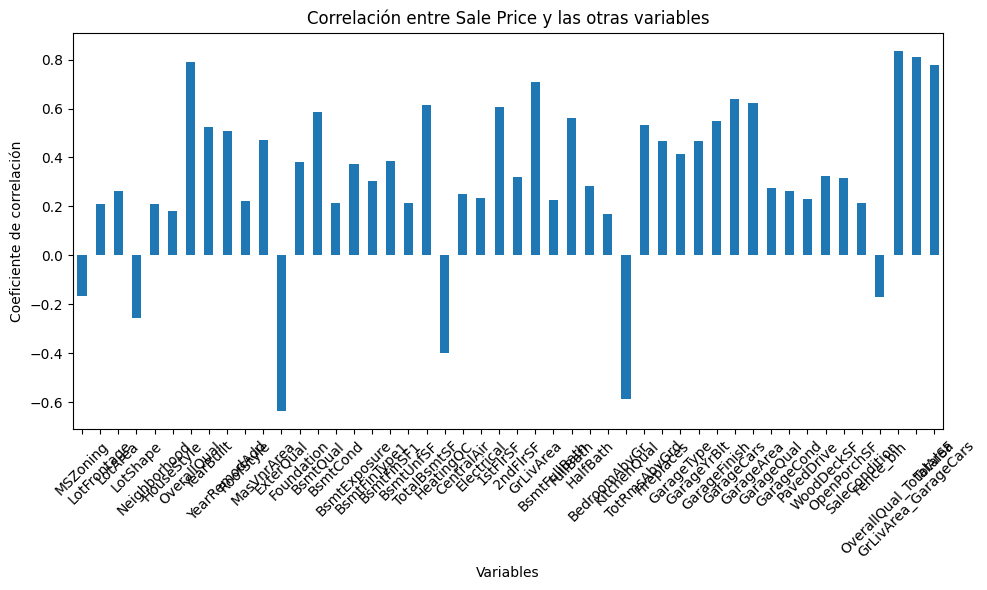

In [101]:
import matplotlib.pyplot as plt

correlation_scores = train.corr()['SalePrice'].drop('SalePrice')

# Filtrar las variables con correlación mayor a 0.15
high_corr_vars = correlation_scores[abs(correlation_scores) > 0.15]

# Graficar la correlación en forma de barras
plt.figure(figsize=(10, 6))
high_corr_vars.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de correlación')
plt.title('Correlación entre Sale Price y las otras variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = train.corr()
correlation_threshold = 0.4
high_corr_vars = corr_matrix[abs(corr_matrix['SalePrice']) > correlation_threshold]['SalePrice'].index
corr_submatrix = train[high_corr_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_submatrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de SalePrice')
plt.show()

In [ ]:
import folium
mapa_ames = folium.Map(location=[42.0308, -93.6319], zoom_start=13)
barrios = {
    'Blmngtn': (42.062806, -93.639963),
    'Blueste': (42.053048, -93.648645),
    'BrDale': (42.052500, -93.628955),
    'BrkSide': (42.033590, -93.626256),
    'ClearCr': (42.034310, -93.647567),
    'CollgCr': (42.021679, -93.651743),
    'Crawfor': (42.021501, -93.624872),
    'Edwards': (42.022800, -93.663973),
    'Gilbert': (42.060214, -93.636856),
    'IDOTRR': (42.019208, -93.623956),
    'MeadowV': (42.051611, -93.617025),
    'Mitchel': (42.028038, -93.626346),
    'Names': (42.042257, -93.613452),
    'NoRidge': (42.050307, -93.643253),
    'NPkVill': (42.051955, -93.651430),
    'NridgHt': (42.048444, -93.643282),
    'NWAmes': (42.051619, -93.674951),
    'OldTown': (42.029570, -93.615339),
    'SWISU': (42.017578, -93.651381),
    'Sawyer': (42.034270, -93.667263),
    'SawyerW': (42.042875, -93.650286),
    'Somerst': (42.052191, -93.645596),
    'StoneBr': (42.060749, -93.622224),
    'Timber': (42.060331, -93.671070),
    'Veenker': (42.040161, -93.653485)
}

# Agregar marcadores para cada barrio
for barrio, coordenadas in barrios.items():
    folium.Marker(
        location=coordenadas,
        popup=barrio,
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(mapa_ames)

# Mostrar el mapa
mapa_ames

In [105]:
from google.colab import files
ruta = "/content/mapa_ames.html"
files.download(ruta)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [115]:
mean = np.mean(train['SalePrice'])
median = np.median(train['SalePrice'])
mode = train['SalePrice'].mode().values[0]
print("Media:", mean)
print("Mediana:", median)
print("Moda:", mode)

Media: 180921.19589041095
Mediana: 163000.0
Moda: 140000


### Transformación de la base

In [60]:
numerical_features = train.select_dtypes(include=np.number).columns
train[numerical_features] = train[numerical_features].fillna(train[numerical_features].median())
categorical_features = train.select_dtypes(include='object').columns
train[categorical_features] = train[categorical_features].fillna(train[categorical_features].mode().iloc[0])

numerical_features = test.select_dtypes(include=np.number).columns
test[numerical_features] = test[numerical_features].fillna(test[numerical_features].median())
categorical_features = test.select_dtypes(include='object').columns
test[categorical_features] = test[categorical_features].fillna(test[categorical_features].mode().iloc[0])

In [61]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
categorical_features = train.select_dtypes(include='object').columns
train[categorical_features] = train[categorical_features].apply(lambda x: label_encoder.fit_transform(x))
categorical_features = test.select_dtypes(include='object').columns
test[categorical_features] = test[categorical_features].apply(lambda x: label_encoder.fit_transform(x))

In [ ]:
# categorical_features_train = train.select_dtypes(include=['object']).columns.tolist()
# categorical_features_test = test.select_dtypes(include=['object']).columns.tolist()
# train = pd.get_dummies(train, columns=categorical_features_train)
# test = pd.get_dummies(test, columns=categorical_features_test)

In [62]:
train['TotalArea'] = train['1stFlrSF'] + train['2ndFlrSF']
train['OverallQual_TotalArea'] = train['OverallQual'] * train['TotalArea']
train['GrLivArea_GarageCars'] = train['GrLivArea'] * train['GarageCars']
train['m2_techados'] = train['GrLivArea'] + train['TotalBsmtSF']
train['Age'] = train['YrSold'] - train['YearBuilt']
train['RemodelAge'] = train['YrSold'] - train['YearRemodAdd']
train['YearBuilt_Remodel'] = train['YearBuilt'] * train['YearRemodAdd']
test['Age'] = test['YrSold'] - test['YearBuilt']
test['RemodelAge'] = test['YrSold'] - test['YearRemodAdd']
test['YearBuilt_Remodel'] = test['YearBuilt'] * test['YearRemodAdd']
test['m2_techados'] = test['GrLivArea'] + test['TotalBsmtSF']
test['TotalArea'] = test['1stFlrSF'] + test['2ndFlrSF']
test['OverallQual_TotalArea'] = test['OverallQual'] * test['TotalArea']
test['GrLivArea_GarageCars'] = test['GrLivArea'] * test['GarageCars']

In [ ]:
pd.set_option('display.max_rows', None)
correlation = train.corr()['SalePrice']
print(correlation)

In [ ]:
print(train.columns)

In [ ]:
train_columns = set(train.columns)
test_columns = set(Z.columns)
missing_in_test = train_columns - test_columns
missing_in_train = test_columns - train_columns
print("Columnas faltantes en test:", missing_in_test)
print("Columnas faltantes en train:", missing_in_train)


Columnas faltantes en test: {'SalePrice'}
Columnas faltantes en train: set()


# Analisis predictivo

In [ ]:
pip install catboost

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [94]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1).values, train['SalePrice'].values, test_size=0.1, random_state=42)

In [95]:
Z = test.values

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Crear y ajustar el modelo XGBRegressor
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Obtener la importancia de las variables
importance = model.feature_importances_
feature_names = train.columns

# Ordenar las variables por su importancia
sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Crear un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico según tus preferencias
plt.bar(range(len(importance)), sorted_importance)
plt.xticks(range(len(importance)), sorted_feature_names, rotation=90)
plt.title('Importancia de las variables')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.tight_layout()  # Ajustar el espaciado entre los elementos del gráfico
plt.show()

In [93]:
threshold = 0.01
selected_features = [feature for feature, importance_score in zip(feature_names, importance) if importance_score > threshold]
train_selected = train[selected_features]
test_selected = test[selected_features]

In [86]:
train_selected = pd.DataFrame(train_selected, columns=train.columns)
train_selected['SalePrice'] = train['SalePrice']

In [87]:
test_selected = pd.DataFrame(test_selected, columns=test.columns)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train_selected.drop('SalePrice', axis=1).values, train_selected['SalePrice'].values, test_size=0.1, random_state=42)

# Random Forest

In [ ]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
random_forest_preds = random_forest_reg.predict(X_test)
random_forest_accuracy = random_forest_reg.score(X_test, y_test)
print("Precisión de Bosque Aleatorio:", random_forest_accuracy)

Precisión de Bosque Aleatorio: 0.896709159276371


In [ ]:
scores = cross_val_score(random_forest_reg, train.drop('SalePrice', axis=1), train['SalePrice'], cv=20, scoring='r2')
print("Puntajes de validación cruzada:", scores)
print("Puntaje promedio de validación cruzada:", scores.mean())

Puntajes de validación cruzada: [0.89133589 0.81435    0.88689929 0.88217255 0.91015674 0.92708941
 0.88257177 0.54666295 0.92085024 0.85932854 0.89695981 0.87495348
 0.88632133 0.90061023 0.86645322 0.89292689 0.88598023 0.64534254
 0.82644899 0.90293771]
Puntaje promedio de validación cruzada: 0.8550175913556408


In [ ]:
param_grid  = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=15)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.set_params(max_depth=10)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()
print("Puntajes de validación cruzada:", cv_scores)
print("Puntuación promedio de la validación cruzada:", mean_cv_score)
print(best_params)

In [ ]:
parameters = {
    'n_estimators': [300],
    'max_depth': [10],  # Corregir aquí, envolver en una lista
    'min_samples_split': [10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, parameters, cv=5)
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
random_forest_predicciones = best_model.predict(Z)


In [ ]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
random_forest_preds = random_forest_reg.predict(Z)

In [ ]:
submission_df = pd.DataFrame({'Id': Z['Id'], 'SalePrice': random_forest_preds})
submission_df.to_csv('RFsubmission.csv', index=False)
from google.colab import files
files.download('RFsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# XGBoost

In [89]:
parametros = {
    'nthread': [4],
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100],
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
model = XGBRegressor()
grid_search = GridSearchCV(model, parametros, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)
print("Puntajes de validación cruzada:", cv_scores)
print("Score:", mean_score)
print("Desviación estándar:", std_score)
print("Mejores hiperparámetros:", best_params)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

Puntajes de validación cruzada: [0.88547049 0.88330435 0.87087988 0.86074525 0.88284911]
Score: 0.876649816114883
Desviación estándar: 0.009452680130450438
Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'nthread': 4, 'subsample': 0.8}
R2: 0.9095408508991784


In [90]:
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
XGBoost_Predicciones = best_model.predict(Z)

In [91]:
submission_df = pd.DataFrame({'Id': test_id['Id'], 'SalePrice': XGBoost_Predicciones})

In [92]:
submission_df.to_csv('XGBsubmission.csv', index=False)
from google.colab import files
files.download('XGBsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Regresión Ridge

In [ ]:
alpha_values = [0.1, 1.0, 10.0]
ridge_reg = Ridge()
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ridge_reg = grid_search.best_estimator_
y_pred = best_ridge_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Puntuación R²: ", r2)

Puntuación R²:  0.8442306255498634


In [ ]:
alpha_values = [0.1, 1.0, 10.0]
ridge_reg = Ridge()
param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_ridge_reg = grid_search.best_estimator_
RegresionRidge_Predicciones = best_ridge_reg.predict(Z)

In [ ]:
submission_df = pd.DataFrame({'Id': test_id['Id'], 'SalePrice': RegresionRidge_Predicciones})
submission_df.to_csv('RegRidgesubmission.csv', index=False)
files.download('RegRidgesubmission.csv')

### Cat Boost Regressor

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'depth': [4, 6, 8],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}
model = CatBoostRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_params)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

In [ ]:
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
CatBoost_Predicciones = best_model.predict(Z)
submission_df = pd.DataFrame({'Id': test_id['Id'], 'SalePrice': CatBoost_Predicciones})
submission_df.to_csv('Catsubmission.csv', index=False)
from google.colab import files
files.download('Catsubmission.csv')

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [2, 3, 4, 5],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
model = LGBMRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
cv_results = grid_search.cv_results_
print("Resultados de la validación cruzada:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("R2:", mean_score)
    print("Hiperparámetros:", params)
    print("---")
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_params)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

In [ ]:
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
LGBM_Predicciones = best_model.predict(Z)

In [ ]:
submission_df = pd.DataFrame({'Id': test_id['Id'], 'SalePrice': LGBM_Predicciones})
submission_df.to_csv('LGBMsubmission.csv', index=False)
from google.colab import files
files.download('LGBMsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Gradient Boosting

In [ ]:
model = GradientBoostingRegressor()
param_grid = {
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R2):", r2)

In [ ]:
grid_search.fit(train.drop('SalePrice', axis=1), train['SalePrice'])
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
GradBoost_Predicciones = best_model.predict(Z)

In [ ]:
submission_df = pd.DataFrame({'Id': test_id['Id'], 'SalePrice': GradBoost_Predicciones})
submission_df.to_csv('Gradsubmission.csv', index=False)
from google.colab import files
files.download('Gradsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>